In [1]:
%matplotlib inline
import torch as t
import numpy as np
import matplotlib.pyplot as plt
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F

In [2]:
import os

In [3]:
import torchvision.transforms as transforms
from torchvision.transforms import ToPILImage
show = ToPILImage()

In [4]:
import torchvision as tv

In [6]:
# import os
for dirname, _, filenames in os.walk('/pytorch/Data/cifar-10-batches-py'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        # print(filename)

/pytorch/Data/cifar-10-batches-py\batches.meta
/pytorch/Data/cifar-10-batches-py\data_batch_1
/pytorch/Data/cifar-10-batches-py\data_batch_2
/pytorch/Data/cifar-10-batches-py\data_batch_3
/pytorch/Data/cifar-10-batches-py\data_batch_4
/pytorch/Data/cifar-10-batches-py\data_batch_5
/pytorch/Data/cifar-10-batches-py\readme.html
/pytorch/Data/cifar-10-batches-py\test_batch


In [9]:
# 加载数据

# 数据预处理
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

# 加载训练集
trainset = tv.datasets.CIFAR10(
    train=True,
    download=False,
    root='/pytorch/Data/',
    transform=transform
)

trainloader = t.utils.data.DataLoader(
    trainset,
    shuffle=True,
    batch_size=8,
    num_workers=8  # 提高GPU使用率
)

# 加载测试集
testset = tv.datasets.CIFAR10(
    train=False,
    download=False,
    root='/pytorch/Data/',
    transform=transform
)

testloader = t.utils.data.DataLoader(
    testset,
    shuffle=True,
    batch_size=8,
    num_workers=8  # 提高GPU使用率
)


In [13]:
classes = np.array(['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck'])

In [10]:
trainiter = iter(trainloader)
imgs, labels = trainiter.next()

In [11]:
print(imgs.size(), labels.size())

torch.Size([8, 3, 32, 32]) torch.Size([8])


In [12]:
print(len(trainset))

50000


In [14]:
print(classes[labels])

['ship' 'frog' 'horse' 'truck' 'horse' 'frog' 'horse' 'plane']


ship


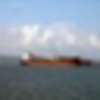

In [16]:
img1 = imgs[0]
print(classes[labels[0]])
show((img1+1) / 2).resize((100, 100))

In [5]:
# 定义网络
cfg = {
    'VGG11': [64, 'M', 128, 'M', 256, 256, 'M', 512, 512, 'M', 512, 512, 'M'],
    'VGG13': [64, 64, 'M', 128, 128, 'M', 256, 256, 'M', 512, 512, 'M', 512, 512, 'M'],
    'VGG16': [64, 64, 'M', 128, 128, 'M', 256, 256, 256, 'M', 512, 512, 512, 'M', 512, 512, 512, 'M'],
    'VGG19': [64, 64, 'M', 128, 128, 'M', 256, 256, 256, 256, 'M', 512, 512, 512, 512, 'M', 512, 512, 512, 512, 'M'],
}


class VGG(nn.Module):
    def __init__(self, vgg_name):
        super(VGG, self).__init__()
        self.features = self._make_layers(cfg[vgg_name])
        self.classifier = nn.Linear(512, 10)

    def forward(self, x):
        out = self.features(x)
        out = out.view(out.size(0), -1)
        out = self.classifier(out)
        return out

    def _make_layers(self, cfg):
        layers = []
        in_channels = 3
        for x in cfg:
            if x == 'M':
                layers += [nn.MaxPool2d(kernel_size=2, stride=2)]
            else:
                layers += [nn.Conv2d(in_channels, x, kernel_size=3, padding=1),
                           nn.BatchNorm2d(x),
                           nn.ReLU(inplace=True)]
                in_channels = x
        layers += [nn.AvgPool2d(kernel_size=1, stride=1)]
        return nn.Sequential(*layers)


def VGG11():
    return VGG('VGG11')


def VGG13():
    return VGG('VGG13')


def VGG16():
    return VGG('VGG16')


def VGG19():
    return VGG('VGG19')

In [6]:
list_net = [VGG11(), VGG13()]

In [ ]:
for list_net